# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('sinasc_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [7]:
# Categorizar a variável APGAR5
bins = [0, 3, 5, 7, 10]
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']
df['APGAR5_categoria'] = pd.cut(df['APGAR5'], bins=bins, labels=labels, include_lowest=True)

# Mostrar as primeiras linhas do dataframe com a nova coluna categorizada
print(df[['APGAR5', 'APGAR5_categoria']].head())

# Verificar a distribuição das categorias
print(df['APGAR5_categoria'].value_counts())

   APGAR5 APGAR5_categoria
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal
APGAR5_categoria
normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

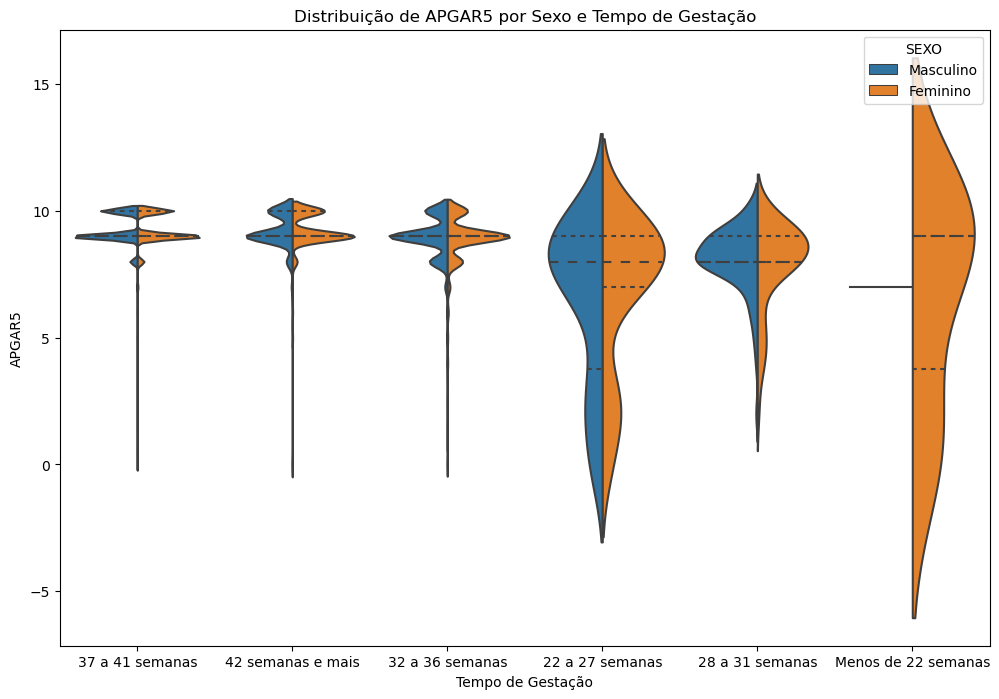

In [10]:
df = df[['APGAR5', 'SEXO', 'GESTACAO']].dropna()

# Ajustar o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar o gráfico de violino
sns.violinplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df, split=True, inner='quartile')

# Adicionar título e rótulos
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')

# Mostrar o gráfico
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [11]:
# Criar a tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])

# Mostrar a tabela cruzada
print(tabela_cruzada)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     1     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    44   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13564  7283  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [12]:
# Criar a tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])

# Calcular os percentuais de linha
tabela_percentual_linha = pd.crosstab(df['GESTACAO'], df['APGAR5'], normalize='index') * 100

# Mostrar a tabela cruzada com percentuais de linha
print(tabela_percentual_linha)

APGAR5                    0.0       1.0        2.0       3.0       4.0   \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089566  0.089566   0.044783  0.089566  0.358262   
37 a 41 semanas       0.022202  0.088810   0.013321  0.022202  0.031083   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   

APGAR5                   5.0       6.0        7.0        8.0        9.0   \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas      0.492611  0.761308   2.507837  16.211375  58.531124   
37 a 41 semanas    

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

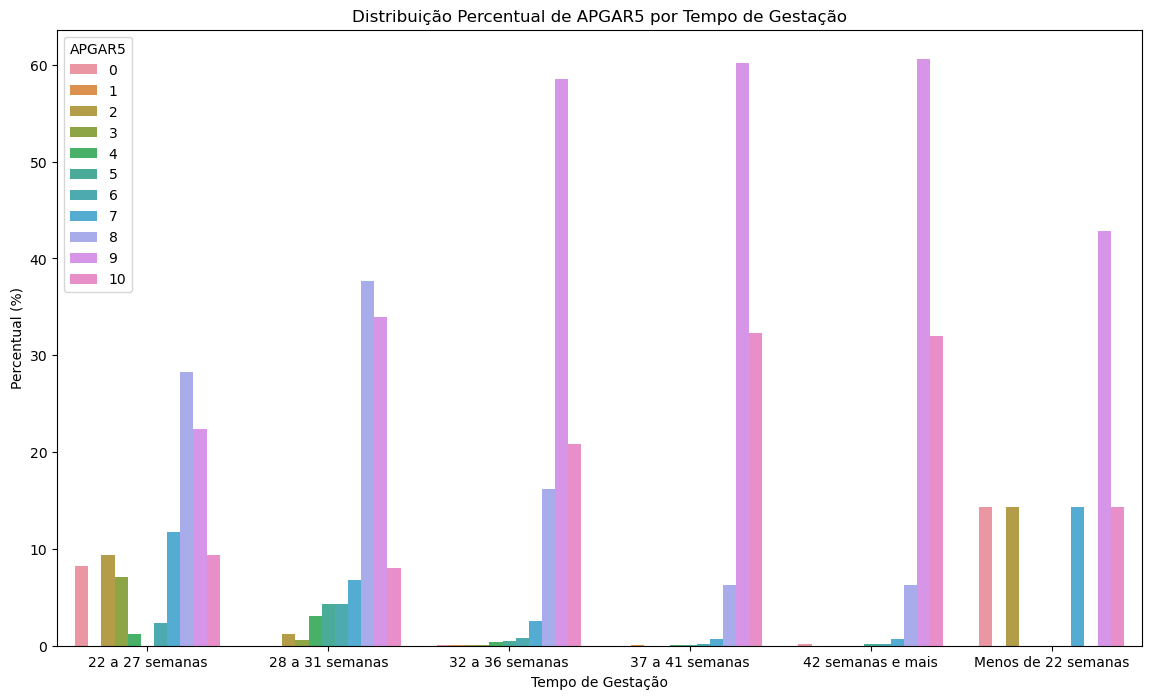

In [14]:
# Filtrar as colunas relevantes e remover linhas com valores NaN
df = df[['APGAR5', 'SEXO', 'GESTACAO']].dropna()

# Certificar que APGAR5 é do tipo inteiro
df['APGAR5'] = df['APGAR5'].astype(int)

# Criar a tabela cruzada com percentuais de linha
tabela_percentual_linha = pd.crosstab(df['GESTACAO'], df['APGAR5'], normalize='index') * 100

# Resetar o índice para transformar as categorias de GESTACAO em uma coluna
tabela_percentual_linha = tabela_percentual_linha.reset_index()

# Transformar a tabela cruzada em formato longo para facilitar a plotagem
tabela_long = tabela_percentual_linha.melt(id_vars='GESTACAO', var_name='APGAR5', value_name='Percentual')

# Ajustar a coluna APGAR5 para ser do tipo string
tabela_long['APGAR5'] = tabela_long['APGAR5'].astype(str)

# Ajustar o tamanho da figura
plt.figure(figsize=(14, 8))

# Criar o gráfico de barras
sns.barplot(x='GESTACAO', y='Percentual', hue='APGAR5', data=tabela_long)

# Adicionar título e rótulos
plt.title('Distribuição Percentual de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Percentual (%)')

# Mostrar o gráfico
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

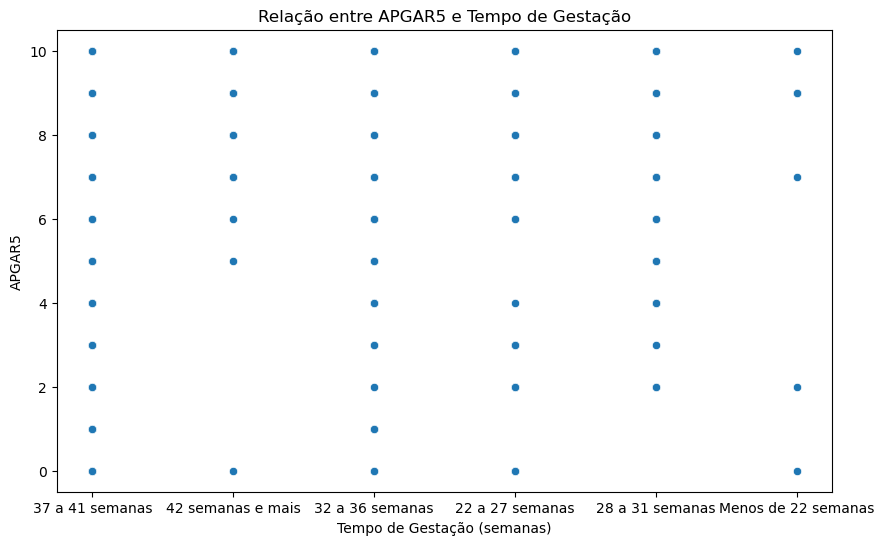

In [18]:
# Filtrar as colunas relevantes e remover linhas com valores NaN
df = df[['APGAR5', 'GESTACAO']].dropna()

# Ajustar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o scatter plot
sns.scatterplot(x='GESTACAO', y='APGAR5', data=df)

# Adicionar título e rótulos
plt.title('Relação entre APGAR5 e Tempo de Gestação')
plt.xlabel('Tempo de Gestação (semanas)')
plt.ylabel('APGAR5')

# Mostrar o gráfico
plt.show()